In [283]:
import random
import math
from decimal import Decimal, getcontext

def BK(n, M, d):
    correct = 0
    wrong = 0
    t = random.random()
    for _ in range(n):
        b = random.random()
        if t >= b:
            # Probability of correct answer is 1
            correct += 1
        else:
            # Probability of correct answer is 1/M
            if random.random() < 1/M:
                correct += 1 
            else:
                wrong += 1
    score = correct - (wrong*d)
    score = max(score, 0)
    return score

def truncate_decimal(num):
    multiplier = 10 ** 2
    truncated_num = math.trunc(num * multiplier)
    return truncated_num / multiplier

def estimate_expected_score(n, M, d):
    total_score = 0
    iters = 0
    prev_1 = 0
    prev_2 = 0
    prev_3 = 0
    prev_4 = 0
    
    while True:
        iters += 1
        score = BK(n, M, d)
        total_score += score
        expected_score = total_score / iters
        expected_score = truncate_decimal(expected_score)
        
        if prev_1 == prev_2 == prev_3 == prev_4 == expected_score and iters >= 100000:
            break
        
        prev_4 = prev_3    
        prev_3 = prev_2
        prev_2 = prev_1 
        prev_1 = expected_score
        
        prev_4 = truncate_decimal(prev_4) 
        prev_3 = truncate_decimal(prev_3)
        prev_2 = truncate_decimal(prev_2)
        prev_1 = truncate_decimal(prev_1)
        
    return expected_score

In [289]:
estimate_expected_score(100,4,0)

62.54

In [292]:
import numpy as np
import pandas as pd

# Set items to 4
M = 4

# Set loop to store values from n and d increments
results = []
n_values = np.arange(10, 101, 10)
d_values = np.arange(0, 1.1, 0.1)
expected_scores = np.zeros((len(n_values), len(d_values)))

for i, n in enumerate(n_values):
    for j, d in enumerate(d_values):
        score = estimate_expected_score(n, M, d)
        expected_scores[i, j] = score
        results.append((n, d, score))

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=['n', 'd', 'Expected score'])

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(df.to_string(index=False))

  n   d  Expected score
 10 0.0            6.23
 10 0.1            5.87
 10 0.2            5.52
 10 0.3            5.19
 10 0.4            4.88
 10 0.5            4.66
 10 0.6            4.38
 10 0.7            4.16
 10 0.8            3.97
 10 0.9            3.81
 10 1.0            3.63
 20 0.0           12.49
 20 0.1           11.76
 20 0.2           10.99
 20 0.3           10.31
 20 0.4            9.63
 20 0.5            9.10
 20 0.6            8.56
 20 0.7            8.08
 20 0.8            7.71
 20 0.9            7.27
 20 1.0            6.96
 30 0.0           18.73
 30 0.1           17.62
 30 0.2           16.52
 30 0.3           15.39
 30 0.4           14.46
 30 0.5           13.52
 30 0.6           12.71
 30 0.7           12.05
 30 0.8           11.39
 30 0.9           10.82
 30 1.0           10.36
 40 0.0           24.96
 40 0.1           23.54
 40 0.2           22.04
 40 0.3           20.56
 40 0.4           19.19
 40 0.5           17.95
 40 0.6           16.86
 40 0.7         

<a list of 7 text.Text objects>

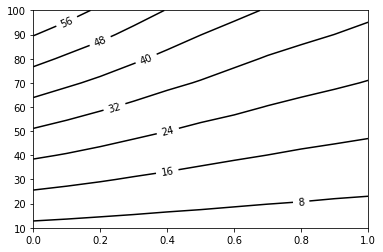

In [293]:
X, Y = np.meshgrid(d_values, n_values)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, expected_scores, colors = "Black")

ax.clabel(CS, CS.levels, inline=True, fontsize=10)

In [301]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Separate results dataframe into columns
n_column, d_column, score_column = zip(*results)

# Combine n and d values into a feature matrix X
X = np.column_stack((n_column, d_column))
Y = np.array(score_column)

# Split the data into training and testing sets (75% for training, 25% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Create polynomial features
degree = 2  # Choose the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a Polynomial Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_poly, Y_train)

intercept = model.intercept_
coefficients = model.coef_

# Generate the expression
expression = f"Expected Score = {intercept:.2f}"
for i, coefficient in enumerate(coefficients[1:]):
    expression += f" + {coefficient:.2f} * (n ** {poly_features.powers_[i+1][0]}) * (d ** {poly_features.powers_[i+1][1]})"

print("Expression:", expression)

# Make predictions on the test set
Y_pred = model.predict(X_test_poly)

# Calculate Mean Absolute Error (MAE) for the test set
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)


Expression: Expected Score = 1.60 + 0.60 * (n ** 1) * (d ** 0) + -8.26 * (n ** 0) * (d ** 1) + 0.00 * (n ** 2) * (d ** 0) + -0.29 * (n ** 1) * (d ** 1) + 8.29 * (n ** 0) * (d ** 2)
Mean Absolute Error (MAE): 0.3183025881662112


In [303]:
import numpy as np

# Set loop to store values from n and d increments
res = []
n_val = np.arange(10, 101, 10)
d_val = np.arange(0, 1.1, 0.1)
m_val = np.arange(2, 6, 1)  # Iterate over values of M from 2 to 5
e_scores = np.zeros((len(n_val), len(d_val), len(m_val)))

for i, n in enumerate(n_val):
    for j, d in enumerate(d_val):
        for k, M in enumerate(m_val):
            score = estimate_expected_score(n, M, d)
            e_scores[i, j] = score
            res.append((n, M, d, score))

# Create a DataFrame from the results
df = pd.DataFrame(res, columns=['n', 'm', 'd', 'Expected score'])

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(df.to_string(index=False))

  n  m   d  Expected score
 10  2 0.0            7.49
 10  3 0.0            6.66
 10  4 0.0            6.24
 10  5 0.0            5.99
 10  2 0.1            7.25
 10  3 0.1            6.33
 10  4 0.1            5.87
 10  5 0.1            5.60
 10  2 0.2            6.99
 10  3 0.2            6.02
 10  4 0.2            5.54
 10  5 0.2            5.25
 10  2 0.3            6.75
 10  3 0.3            5.70
 10  4 0.3            5.20
 10  5 0.3            4.90
 10  2 0.4            6.50
 10  3 0.4            5.39
 10  4 0.4            4.88
 10  5 0.4            4.63
 10  2 0.5            6.27
 10  3 0.5            5.13
 10  4 0.5            4.63
 10  5 0.5            4.38
 10  2 0.6            6.04
 10  3 0.6            4.88
 10  4 0.6            4.37
 10  5 0.6            4.13
 10  2 0.7            5.82
 10  3 0.7            4.65
 10  4 0.7            4.15
 10  5 0.7            3.91
 10  2 0.8            5.62
 10  3 0.8            4.46
 10  4 0.8            4.00
 10  5 0.8            3.74
 

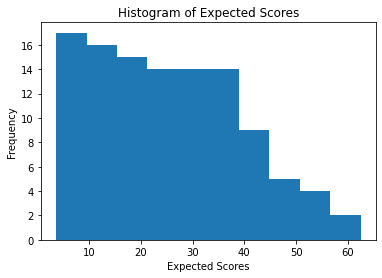

In [304]:
import matplotlib.pyplot as plt

# Plot histogram of expected_scores[i, j, k]
plt.hist(expected_scores.flatten(), bins=10)  # Adjust the number of bins as needed
plt.xlabel('Expected Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Expected Scores')
plt.show()

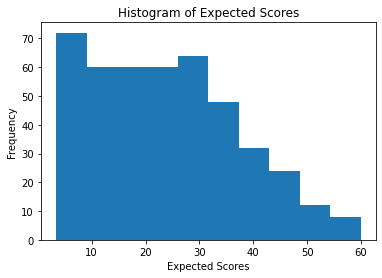

In [305]:
# Plot histogram of expected_scores[i, j, k]
plt.hist(e_scores.flatten(), bins=10)  # Adjust the number of bins as needed
plt.xlabel('Expected Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Expected Scores')
plt.show()

In [312]:
def RK(n, M, d):
    correct = 0
    wrong = 0
    for _ in range(n):
        if random.random() < 1/M:
            correct += 1 
        else:
            wrong += 1
    score = correct - (wrong*d)
    score = max(score, 0)
    return score 

def EES(n, M, d):
    total_score = 0
    iters = 0
    prev_1 = 0
    prev_2 = 0
    prev_3 = 0
    prev_4 = 0
    
    while True:
        iters += 1
        score = RK(n, M, d)
        total_score += score
        expected_score = total_score / iters
        expected_score = truncate_decimal(expected_score)
        
        if prev_1 == prev_2 == prev_3 == prev_4 == expected_score and iters >= 100000:
            break
        
        prev_4 = prev_3    
        prev_3 = prev_2
        prev_2 = prev_1 
        prev_1 = expected_score
        
        prev_4 = truncate_decimal(prev_4) 
        prev_3 = truncate_decimal(prev_3)
        prev_2 = truncate_decimal(prev_2)
        prev_1 = truncate_decimal(prev_1)
        
    return expected_score

In [313]:
### Set loop to store values from n and d increments
M = 4
RvB = []
n_values = np.arange(10, 101, 10)
d_values = np.arange(0, 1.1, 0.1)
expected_scores = np.zeros((len(n_values), len(d_values)))

for i, n in enumerate(n_values):
    for j, d in enumerate(d_values):
        BKscore = estimate_expected_score(n, M, d)
        RKscore = EES(n, M, d)
        if BKscore > RKscore:
            penalty = "Good"
        else:
            penalty = "Bad"
        RvB.append((n, d, BKscore, RKscore, penalty))

# Create a DataFrame from the results
df = pd.DataFrame(RvB, columns=['n', 'd', 'BK', 'RK', 'Penalty'])

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
print(df.to_string(index=False))

  n   d    BK    RK Penalty
 10 0.0  6.25  2.49    Good
 10 0.1  5.89  1.80    Good
 10 0.2  5.52  1.25    Good
 10 0.3  5.19  0.85    Good
 10 0.4  4.88  0.54    Good
 10 0.5  4.63  0.37    Good
 10 0.6  4.38  0.25    Good
 10 0.7  4.15  0.15    Good
 10 0.8  4.01  0.12    Good
 10 0.9  3.80  0.08    Good
 10 1.0  3.64  0.04    Good
 20 0.0 12.50  5.00    Good
 20 0.1 11.75  3.53    Good
 20 0.2 11.01  2.23    Good
 20 0.3 10.28  1.27    Good
 20 0.4  9.67  0.67    Good
 20 0.5  9.09  0.34    Good
 20 0.6  8.56  0.17    Good
 20 0.7  8.10  0.08    Good
 20 0.8  7.71  0.04    Good
 20 0.9  7.34  0.02    Good
 20 1.0  6.96  0.01    Good
 30 0.0 18.75  7.50    Good
 30 0.1 17.67  5.25    Good
 30 0.2 16.50  3.18    Good
 30 0.3 15.43  1.62    Good
 30 0.4 14.44  0.73    Good
 30 0.5 13.56  0.28    Good
 30 0.6 12.76  0.11    Good
 30 0.7 11.97  0.04    Good
 30 0.8 11.46  0.01    Good
 30 0.9 10.81  0.00    Good
 30 1.0 10.28  0.00    Good
 40 0.0 25.07 10.00    Good
 40 0.1 23.50  7.00 